Alfred Wisana
C14210177

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread('lena.png')

In [3]:
height, width = image.shape[:2]

print("Image width:", width)
print("Image height:", height)

Image width: 512
Image height: 512


In [4]:
image = cv2.resize(image, (200, 200), interpolation=cv2.INTER_LINEAR)

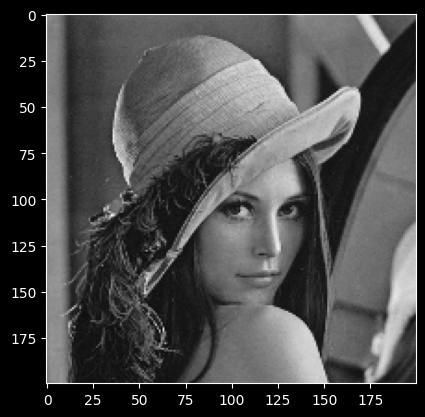

In [5]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

BLUR IMAGE

In [6]:
blur = cv2.blur(gray, (15,15))

Gaussian Blur

In [7]:
gauss_blur = cv2.GaussianBlur(gray,(17,17),0)

CUSTOM KERNEL

In [8]:
kernel = np.ones((5,5), dtype=np.float32)/25

custom_blur = cv2.filter2D(gray,-1,kernel=kernel)

Partial Blur

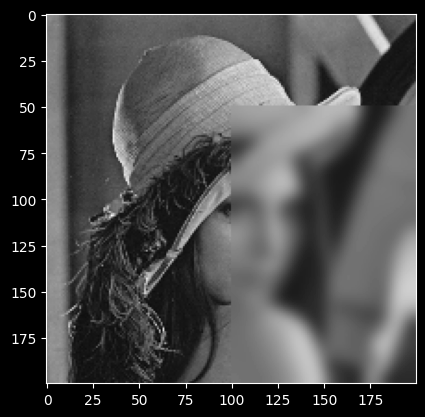

In [26]:
x, y, w, h = 100, 50, 200, 200

part_blur = gray.copy()

mask = np.zeros_like(part_blur)

kernel_size = (25,25)

cv2.rectangle(mask, (x, y), (x + w, y + h), (255, 255, 255), -1)

blurred_region = cv2.GaussianBlur(part_blur[y:y+h, x:x+w], kernel_size, 0)

part_blur[y:y+h, x:x+w] = blurred_region

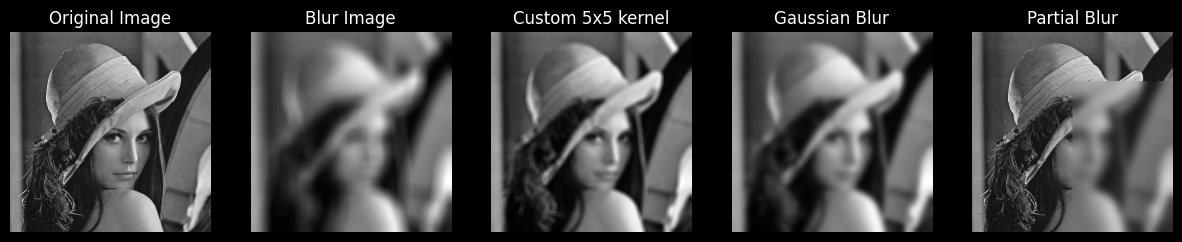

In [27]:
plt.figure(figsize=(15, 5))

# Plot original image
plt.subplot(1, 5, 1)
plt.imshow(gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Plot blurred image
plt.subplot(1, 5, 2)
plt.imshow(blur, cmap='gray')
plt.title('Blur Image')
plt.axis('off')

# Plot Custome blurred image
plt.subplot(1, 5, 3)
plt.imshow(custom_blur, cmap='gray')
plt.title('Custom 5x5 kernel')
plt.axis('off')

#Gaussian Blur
plt.subplot(1, 5, 4)
plt.imshow(gauss_blur, cmap='gray')
plt.title('Gaussian Blur')
plt.axis('off')

#Partial Blur
plt.subplot(1, 5, 5)
plt.imshow(part_blur, cmap='gray')
plt.title('Partial Blur')
plt.axis('off')

plt.show()


Image Sharpening

In [11]:
sharpened = cv2.Laplacian(gray,-1 ,ksize=5)  

Custom Kernel Sharpen

In [12]:
kernel = np.array([[-3, 1, 1, 1, 1],
                   [-3, 1, 1, 1, 1],
                   [-1, 1, 5, 0, -1],
                   [-1, 1, 0, 1, -1],
                   [-2, 1, 0, 0, 1]])
custom_sharp = cv2.filter2D(gray,-1,kernel=kernel)

In [13]:
kernel2 = np.array([
    [1, -1, -1, -1, -1, -1, -1],
    [1, -1, -1, 5, -1, -1, -1],
    [1, -1, -1, 0, -1, -1, -1],
    [-1, -1, -1, 50, -1, 1, -1],
    [-1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, 10, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1]
], dtype=np.float32)

custom_sharp_2 = cv2.filter2D(gray,-1,kernel=kernel2)

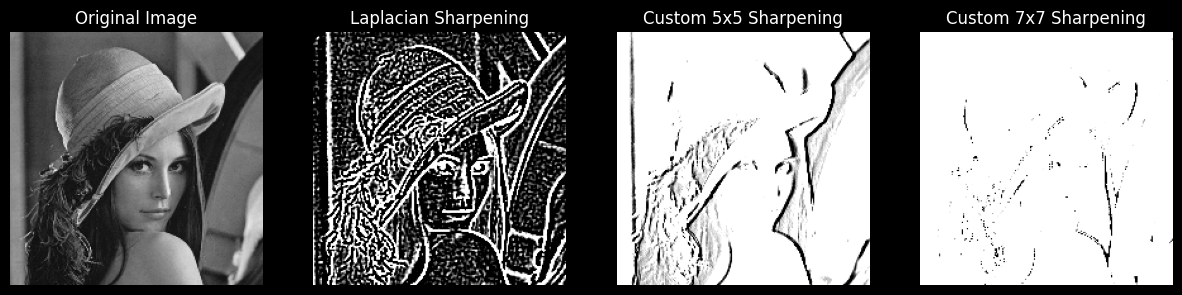

In [14]:
plt.figure(figsize=(15,15))


plt.subplot(1,4,1)
plt.imshow(gray,cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(sharpened,cmap='gray')
plt.title('Laplacian Sharpening')
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(custom_sharp,cmap='gray')
plt.title('Custom 5x5 Sharpening')
plt.axis('off')


plt.subplot(1,4,4)
plt.imshow(custom_sharp_2,cmap='gray')
plt.title('Custom 7x7 Sharpening')
plt.axis('off')


plt.show()

Edge Detection

Canny edges

In [15]:
canny_edges = cv2.Canny(gray, 200, 100) 


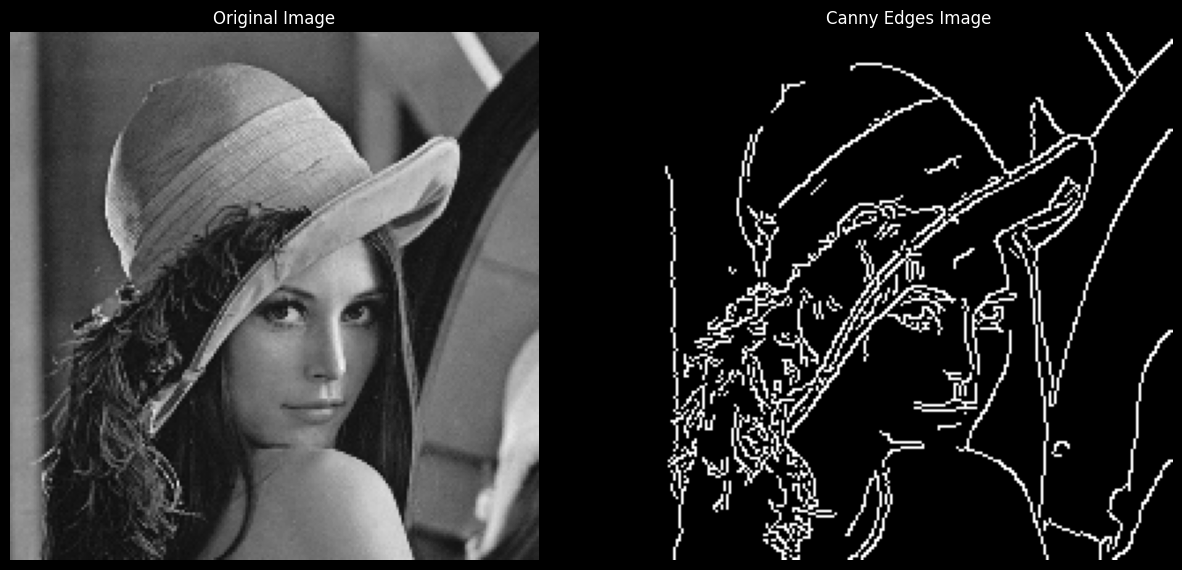

In [16]:
plt.figure(figsize=(15,15))


plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edges Image')
plt.axis('off')



plt.show()